In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from fbprophet import Prophet
import pmdarima as pmd

In [478]:
pd.plotting.register_matplotlib_converters()
plt.rcParams['figure.figsize'] = [16, 4]

In [479]:
data1 = pd.read_csv("../data/2019-07WeatherIAZUL4.csv", parse_dates=["timestamp"])
data2 = pd.read_csv("../data/2019-08WeatherIAZUL4.csv", parse_dates=["timestamp"])
data3 = pd.read_csv("../data/2019-09WeatherIAZUL4.csv", parse_dates=["timestamp"])

In [480]:
data = pd.concat([data1, data2, data3], ignore_index=True)

In [481]:
data.head()

,timestamp,solarRadiationHigh,uvHigh,winddirAvg,humidityAvg,tempAvg,windspeedAvg,windgustAvg,heatindexAvg,precipRate,precipTotal
0,2019-07-01 00:04:48,0.0,0.0,131,86.2,37.8,0.2,0.7,37.8,0.0,0.0
1,2019-07-01 00:09:48,0.0,0.0,167,86.2,37.8,0.5,1.0,37.8,0.0,0.0
2,2019-07-01 00:14:48,0.0,0.0,182,86.3,37.6,0.3,0.8,37.6,0.0,0.0
3,2019-07-01 00:19:48,0.0,0.0,186,87.0,37.4,0.3,0.8,37.4,0.0,0.0
4,2019-07-01 00:24:48,0.0,0.0,176,87.6,37.2,0.2,0.7,37.2,0.0,0.0


In [482]:
data.tail()

,timestamp,solarRadiationHigh,uvHigh,winddirAvg,humidityAvg,tempAvg,windspeedAvg,windgustAvg,heatindexAvg,precipRate,precipTotal
25910,2019-09-30 20:39:56,0.0,0.0,119,77.4,55.0,0.1,0.1,55.0,0.0,0.2
25911,2019-09-30 20:44:56,0.0,0.0,94,78.4,55.0,0.0,0.0,55.0,0.0,0.2
25912,2019-09-30 20:49:56,0.0,0.0,94,79.0,54.9,0.1,0.2,54.9,0.0,0.2
25913,2019-09-30 20:54:56,0.0,0.0,88,79.0,54.9,0.1,0.2,54.9,0.0,0.2
25914,2019-09-30 20:59:56,0.0,0.0,91,79.5,54.9,0.0,0.0,54.9,0.0,0.2


In [484]:
data.columns = ["timestamp","radiation", "uv", "winddir", "humidity", "temp", "windspeed", "windgust", "heatindex", "precip_rate", "precip_total"]

In [485]:
data = data.drop(columns=["winddir", "windgust", "heatindex", "precip_rate", "precip_total"])

In [486]:
data.head()

,timestamp,radiation,uv,humidity,temp,windspeed
0,2019-07-01 00:04:48,0.0,0.0,86.2,37.8,0.2
1,2019-07-01 00:09:48,0.0,0.0,86.2,37.8,0.5
2,2019-07-01 00:14:48,0.0,0.0,86.3,37.6,0.3
3,2019-07-01 00:19:48,0.0,0.0,87.0,37.4,0.3
4,2019-07-01 00:24:48,0.0,0.0,87.6,37.2,0.2


In [487]:
data.tail()

,timestamp,radiation,uv,humidity,temp,windspeed
25910,2019-09-30 20:39:56,0.0,0.0,77.4,55.0,0.1
25911,2019-09-30 20:44:56,0.0,0.0,78.4,55.0,0.0
25912,2019-09-30 20:49:56,0.0,0.0,79.0,54.9,0.1
25913,2019-09-30 20:54:56,0.0,0.0,79.0,54.9,0.1
25914,2019-09-30 20:59:56,0.0,0.0,79.5,54.9,0.0


In [488]:
data.timestamp = data.timestamp.dt.round("5min")

In [489]:
data.head()

,timestamp,radiation,uv,humidity,temp,windspeed
0,2019-07-01 00:05:00,0.0,0.0,86.2,37.8,0.2
1,2019-07-01 00:10:00,0.0,0.0,86.2,37.8,0.5
2,2019-07-01 00:15:00,0.0,0.0,86.3,37.6,0.3
3,2019-07-01 00:20:00,0.0,0.0,87.0,37.4,0.3
4,2019-07-01 00:25:00,0.0,0.0,87.6,37.2,0.2


In [490]:
data = data.sort_values("timestamp")

In [491]:
duplic = data.duplicated(subset="timestamp")

In [492]:
data.loc[duplic, :]

,timestamp,radiation,uv,humidity,temp,windspeed
244,2019-07-01 20:20:00,0.0,0.0,72.0,44.8,3.8
514,2019-07-02 20:05:00,0.0,0.0,59.0,43.7,1.6
9091,2019-08-01 20:35:00,0.0,0.0,54.0,47.8,0.2
17785,2019-09-02 10:50:00,119.6,1.0,52.0,46.9,0.0
17788,2019-09-02 11:15:00,45.9,0.0,54.0,46.8,1.3
18684,2019-09-05 14:20:00,491.9,5.0,48.2,49.9,1.2
18924,2019-09-06 11:10:00,122.7,1.0,85.6,48.4,0.8
19021,2019-09-06 19:20:00,0.0,0.0,66.0,53.8,1.5
19029,2019-09-06 20:00:00,0.0,0.0,69.0,52.3,0.9
19277,2019-09-07 16:40:00,179.9,2.0,70.9,61.8,1.0


In [493]:
data = data.drop_duplicates(subset="timestamp")

In [494]:
data = data.set_index("timestamp")

In [495]:
data = data.asfreq("5min")

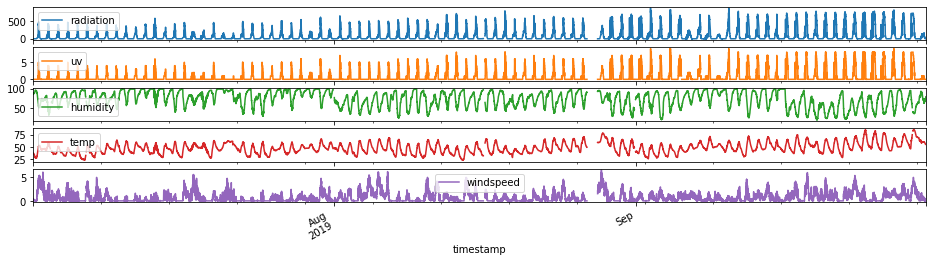

In [496]:
data.plot(subplots=True);

In [498]:
train = data.loc["2019-07-01":"2019-09-23"].copy()
test = data.loc["2019-09-24":"2019-09-30"].copy()

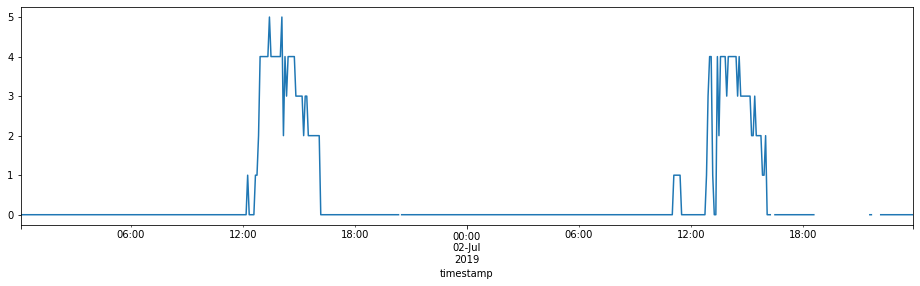

In [502]:
train.uv.loc["2019-07-01":"2019-07-02"].plot()

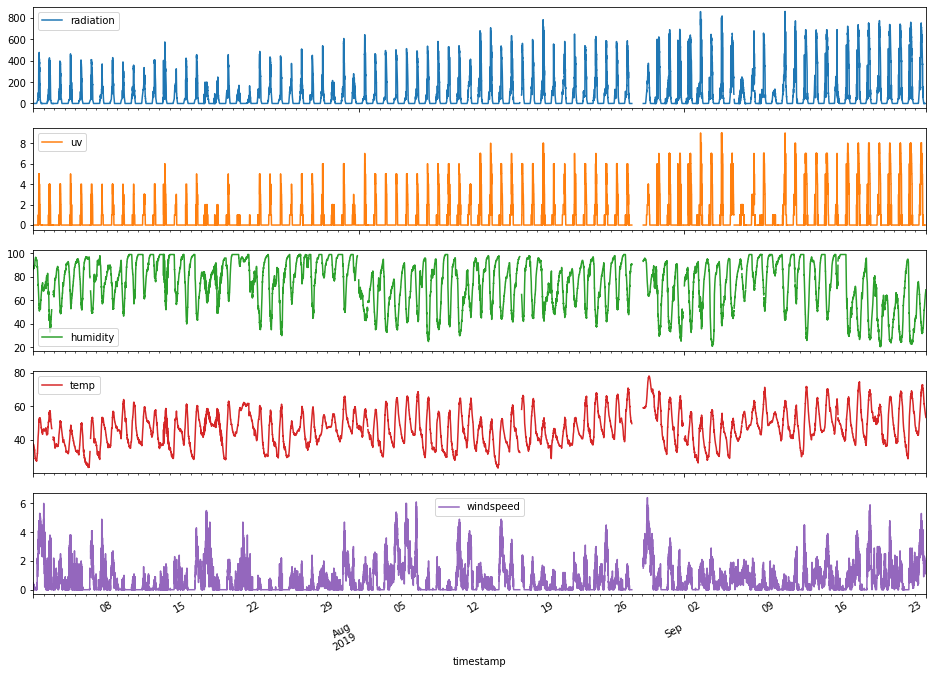

In [499]:
train.plot(subplots=True, figsize=(16,12));

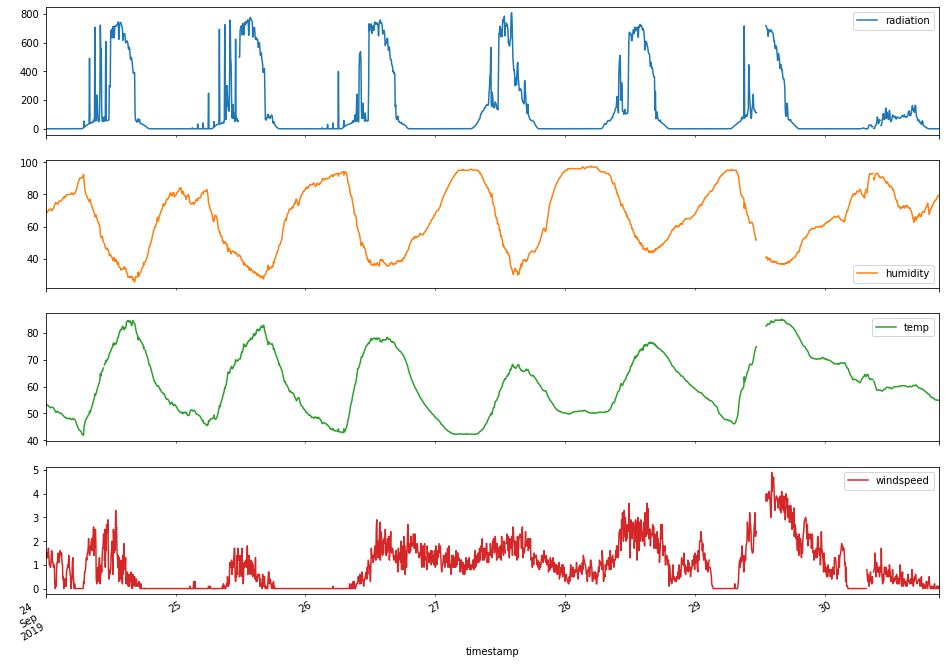

In [373]:
test.plot(subplots=True, figsize=(16,12));

In [286]:
train.isna().sum()

radiation    540
humidity     540
temp         540
windspeed    540
dtype: int64

In [292]:
test.isna().sum()

radiation    28
humidity     28
temp         28
windspeed    28
dtype: int64

In [460]:
model_prophet = Prophet(daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False)
#model_prophet.add_seasonality(name="daily", period=12*24, fourier_order=2)

In [461]:
model_prophet.add_regressor("humidity")
model_prophet.add_regressor("temp")
model_prophet.add_regressor("windspeed")

In [462]:
df_train = train.reset_index()
df_train = df_train.rename(columns={"timestamp":"ds", "radiation":"y"})

In [463]:
df_train.head()

,ds,y,humidity,temp,windspeed
0,2019-07-01 00:05:00,0.0,86.2,37.8,0.2
1,2019-07-01 00:10:00,0.0,86.2,37.8,0.5
2,2019-07-01 00:15:00,0.0,86.3,37.6,0.3
3,2019-07-01 00:20:00,0.0,87.0,37.4,0.3
4,2019-07-01 00:25:00,0.0,87.6,37.2,0.2


In [464]:
df_test = test.reset_index()
df_test = df_test.rename(columns={"timestamp":"ds", "radiation":"y"})

In [465]:
df_test.tail()

,ds,y,humidity,temp,windspeed
1976,2019-09-30 20:40:00,0.0,77.4,55.0,0.1
1977,2019-09-30 20:45:00,0.0,78.4,55.0,0.0
1978,2019-09-30 20:50:00,0.0,79.0,54.9,0.1
1979,2019-09-30 20:55:00,0.0,79.0,54.9,0.1
1980,2019-09-30 21:00:00,0.0,79.5,54.9,0.0


In [466]:
model_prophet.fit(df_train)

In [467]:
future = model_prophet.make_future_dataframe(periods=len(df_test), freq="5min", include_history=False)

In [468]:
future.tail()

,ds
1976,2019-09-30 20:40:00
1977,2019-09-30 20:45:00
1978,2019-09-30 20:50:00
1979,2019-09-30 20:55:00
1980,2019-09-30 21:00:00


In [469]:
exog_cols = ["ds", "humidity", "temp", "windspeed"]
future = pd.merge(future, df_test[exog], on="ds")

In [470]:
future.isna().sum()

ds            0
humidity     28
temp         28
windspeed    28
dtype: int64

In [471]:
future = future.interpolate()

In [472]:
#future.loc[future.temp.isna(), ["ds", "temp"]]

In [473]:
forecast = model_prophet.predict(future)

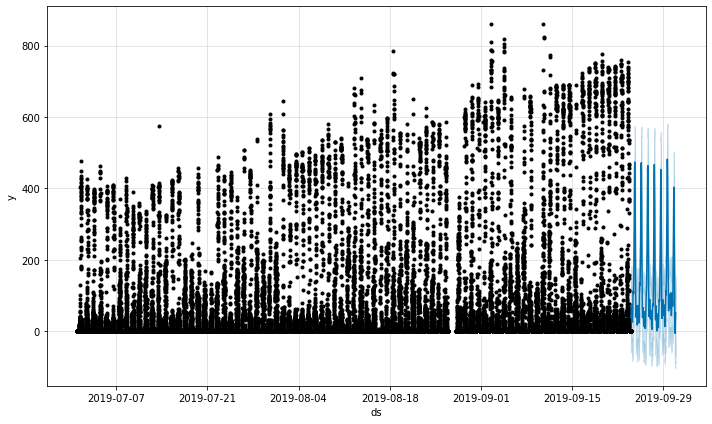

In [474]:
model_prophet.plot(forecast);

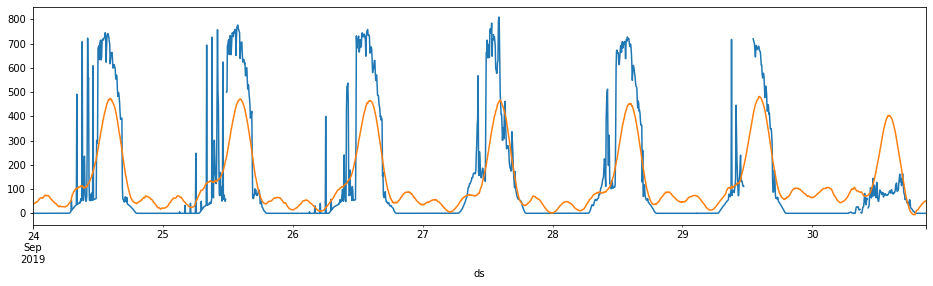

In [475]:
#df_train.set_index("ds").y.plot()
df_test.set_index("ds").loc["2019-09-23":"2019-09-30","y"].plot()
forecast.set_index("ds").loc["2019-09-23":"2019-09-30","yhat"].plot()

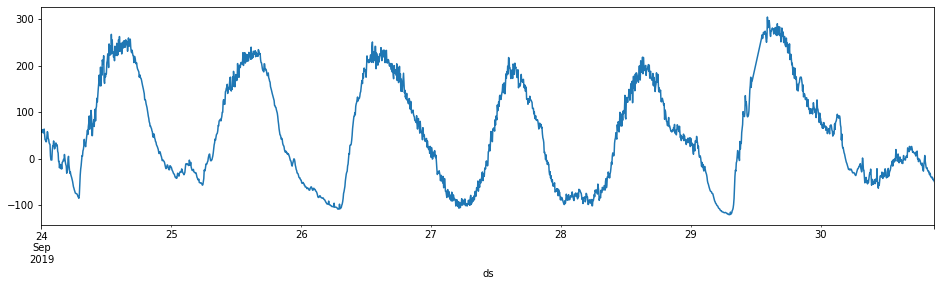

In [424]:
forecast.set_index("ds").loc["2019-09-23":"2019-09-30","yhat"].plot()